ANN for NARX

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch import nn
from scipy.io import loadmat
import os
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ExpSineSquared
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, Normalizer
from sklearn.linear_model import LinearRegression

# out = loadmat(f'UnbalancedDisk-sim-data.mat')
data_dir = 'Data'
data_file = 'UnbalancedDisk-sim-data.mat'
out = loadmat(os.path.join(data_dir, data_file))
x = out['ulist'][0,:]
y = out['ylist'][0,:] 
x=x[0:3000]
y=y[0:3000]

In [2]:
na, nb = 2, 2
ulist = x
ylist = y
def make_training_data(ulist,ylist,na,nb):
    Xdata = []
    Ydata = []
    
    for k in range(max(na,nb),len(ulist)): 
        Xdata.append(np.concatenate([ulist[k-nb:k],ylist[k-na:k]])) 
        Ydata.append(ylist[k])
    return np.array(Xdata), np.array(Ydata)

Xdata, Ydata = make_training_data(ulist,ylist, na, nb)

from sklearn.model_selection import train_test_split 
Xtrain, Xval, Ytrain, Yval = train_test_split(Xdata, Ydata) 

In [3]:
class Network(nn.Module):
    def __init__(self, n_in=4, n_neurons=32):
        super(Network,self).__init__()
        self.lay1 = nn.Linear(n_in,n_neurons).double()
        self.lay2 = nn.Linear(n_neurons,1).double()
    
    def forward(self,u):
        x1 = torch.sigmoid(self.lay1(u)) 
        y = self.lay2(x1)[:,0] 
        return y

In [4]:
X_data=torch.from_numpy(Xtrain)
Y_data=torch.from_numpy(Ytrain)
X_val=torch.from_numpy(Xval)
Y_val=torch.from_numpy(Yval)

In [5]:
model = Network()
print(model)
parameters = list(model.parameters())
print(parameters) 

optimizer = torch.optim.Adam(model.parameters(),lr=1e-4) 
for epoch in range(20000):
    Loss = torch.mean((model(X_data)-Y_data)**2) 
    optimizer.zero_grad()
    Loss.backward() 
    optimizer.step() 
    if epoch%1000==0: 
       print(f'epoch={epoch} Loss={Loss}')

Network(
  (lay1): Linear(in_features=4, out_features=32, bias=True)
  (lay2): Linear(in_features=32, out_features=1, bias=True)
)
[Parameter containing:
tensor([[ 0.2050, -0.3198, -0.1716, -0.1537],
        [-0.4157, -0.3533,  0.2755, -0.4730],
        [ 0.2662, -0.3284,  0.1346, -0.2742],
        [ 0.3867,  0.2881,  0.2855, -0.2974],
        [-0.3498,  0.1315, -0.0470,  0.4041],
        [ 0.4135, -0.3720, -0.1038,  0.3260],
        [-0.1537, -0.2937,  0.4062,  0.0471],
        [ 0.0339,  0.2150, -0.3719,  0.3141],
        [-0.2632,  0.4368,  0.2722, -0.4864],
        [ 0.0867, -0.2265,  0.0768,  0.2747],
        [ 0.3593,  0.2370,  0.0094, -0.2128],
        [-0.3820,  0.4626, -0.4887,  0.1610],
        [-0.4224,  0.4944,  0.4710, -0.0771],
        [ 0.0402, -0.1534,  0.3305,  0.4427],
        [ 0.1117, -0.0230,  0.1272,  0.0779],
        [-0.0579,  0.2351, -0.2840, -0.4993],
        [ 0.2328, -0.0050, -0.4405, -0.1051],
        [-0.3742,  0.1951, -0.1704,  0.1253],
        [ 0.2568, 

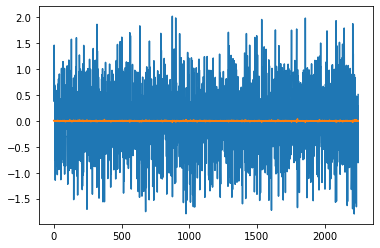

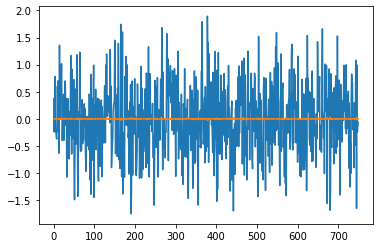

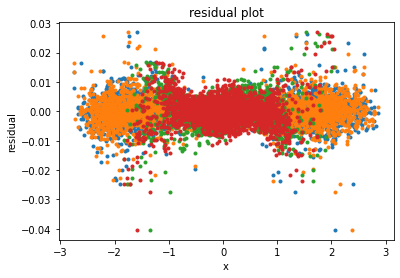

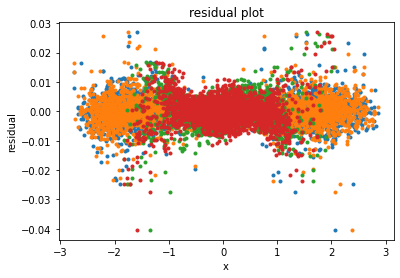

In [6]:
with torch.no_grad():
    plt.plot(model(X_data),label='predicted')
    plt.plot(model(X_data)-Y_data,label='error')  
    plt.show()

    plt.plot(model(X_val),label='predicted')
    plt.plot(model(X_val)-Y_val,label='error')     
    plt.show()

    plt.title('residual plot')
    plt.xlabel('x')
    plt.ylabel('residual')
    plt.plot(X_data,Y_data-model(X_data),'.')
    plt.show()

    plt.title('residual plot')
    plt.xlabel('x')
    plt.ylabel('residual')
    plt.plot(X_data,Y_data-model(X_data),'.')
    plt.show()
    
